In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

from data import create_2d_oval_data

seed = 42
np.random.seed(seed)

In [2]:
def plot_2d_data(x, y, ax: plt.Axes, color="blue", label=""):
    """Plot 2D data."""
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.scatter(x, y, alpha=0.3, color=color, s=3, label=label)
    ax.legend()
    return ax


def add_line_to_plot(
    ax: plt.Axes, angle_degree: float, line_length: float = 2, color="red", label=None
):
    """Add a line to the plot at a specified angle."""
    if label is None:
        label = f"Angle: {angle_degree}°"
    angle_rad = np.deg2rad(angle_degree)
    ax.plot(
        [0, line_length * np.cos(angle_rad)],
        [0, line_length * np.sin(angle_rad)],
        color=color,
        label=label,
    )
    ax.legend()
    return ax

## Prepare 2D Data

In [3]:
angle_degree = 30
width = 2
height = 1
n_samples = 2000
data = create_2d_oval_data(
    angle_degree=angle_degree,
    max_radius_width=width,
    max_radius_height=height,
    n_samples=n_samples,
)

<Axes: >

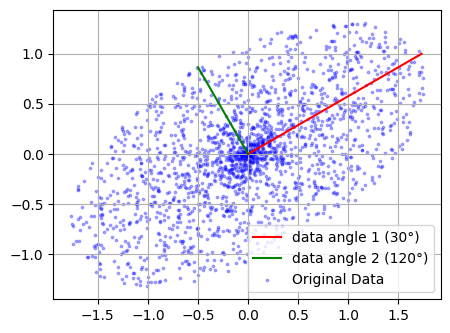

In [4]:
fig, ax = plt.subplots(figsize=(5, 5), nrows=1, ncols=1)
add_line_to_plot(
    ax,
    angle_degree=angle_degree,
    line_length=width,
    label=f"data angle 1 ({angle_degree}°)",
)
add_line_to_plot(
    ax,
    angle_degree=angle_degree + 90,
    line_length=height,
    color="green",
    label=f"data angle 2 ({angle_degree + 90}°)",
)
plot_2d_data(data[:, 0], data[:, 1], label="Original Data", ax=ax)

## Perform PCA

In [5]:
n_components = 1

In [6]:
pca = PCA(n_components=n_components, svd_solver="full")
pca.fit(data)

,n_components,1
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


### Plotting decomposed data

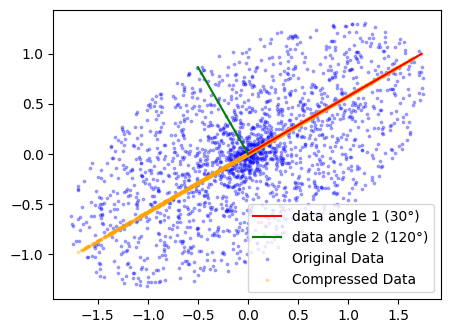

In [7]:
data_transformed = pca.transform(data)
data_reversed = pca.inverse_transform(data_transformed)
plot_2d_data(
    data_reversed[:, 0],
    data_reversed[:, 1],
    ax=ax,
    color="orange",
    label="Compressed Data",
)
fig

## Checking PCA components

`pca.components_`  $\in \mathbb{R}^{d' \times d}$

In [8]:
pca.components_.shape

(1, 2)

thus $W = \texttt{pca.components\_}^T \in \mathbb{R}^{d \times d'}$ and $W$ should match the 30-degree slope

In [9]:
pca_angle_rad = np.arctan(pca.components_[0, 1] / pca.components_[0, 0])
print("PCA angle in degrees:", np.rad2deg(pca_angle_rad))

PCA angle in degrees: 30.098814972465036
